In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from sklearn.datasets import make_blobs

In [63]:
X,y=make_blobs(n_features=2,n_samples=1000,centers=3,random_state=42)

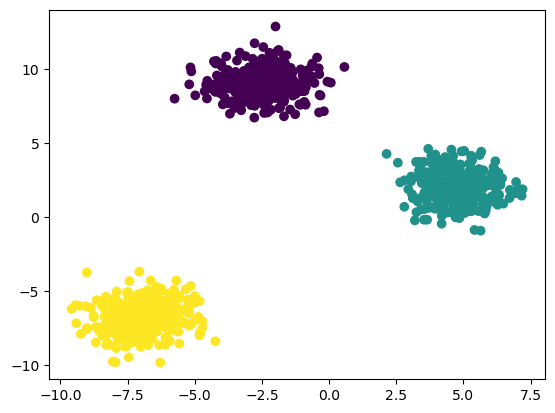

In [64]:
plt.scatter(X[:,0],X[:,1],c=y)

### Dependent Features and Independent Features

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.cluster import KMeans

In [68]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [69]:
wcss

[13539.170839456763,
 3402.9056134496236,
 349.7837673760733,
 300.9777738027571,
 256.30725652593907,
 214.8583068942677,
 188.55145090470378,
 164.86954627360805,
 140.10546411830646,
 128.39207552819613]

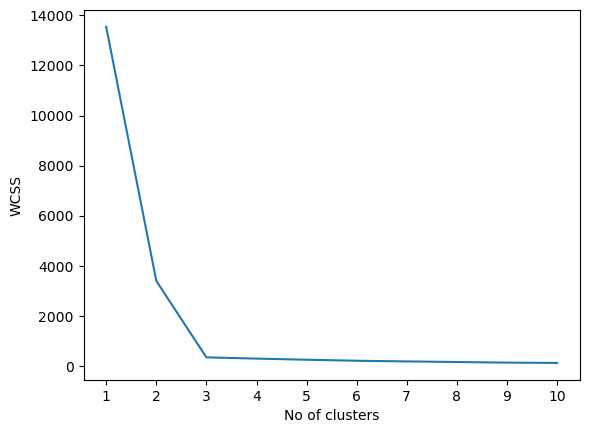

In [70]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [71]:
kmean=KMeans(n_clusters=3,init='k-means++')

In [72]:
y_label=kmean.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


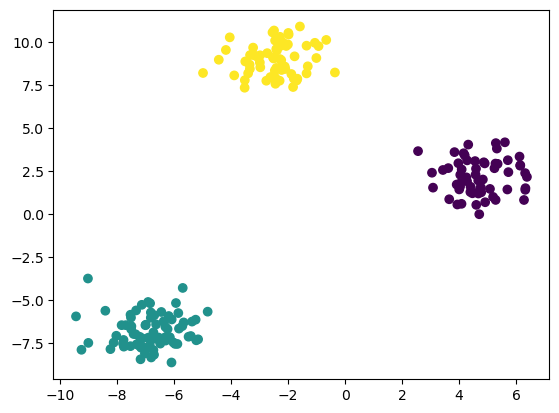

In [73]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [74]:
y_test_label=kmean.predict(X_test)

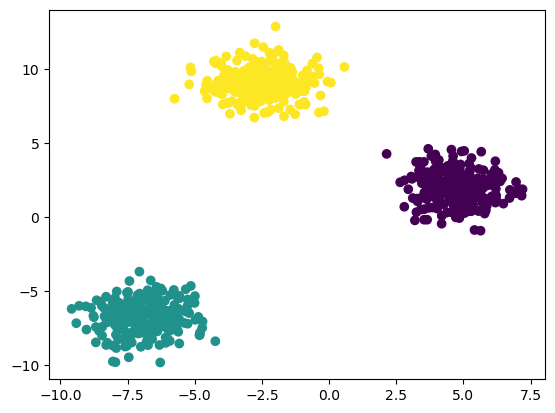

In [75]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [76]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [77]:
from kneed import KneeLocator

In [78]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [79]:
k1.elbow

3

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
silscore=[]
for i in range(2, 11):  # Adjusted range because silhouette score requires at least 2 clusters
    kmean = KMeans(n_clusters=i, init='k-means++')
    kmean.fit(X_train)
    score = silhouette_score(X_train, kmean.labels_)
    silscore.append(score)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

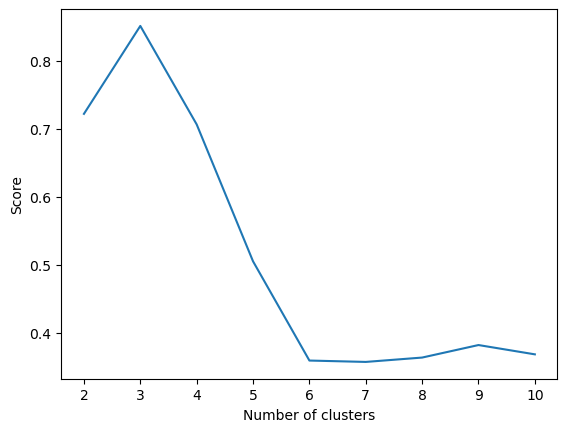

In [82]:
plt.plot(range(2,11),silscore)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()